“线性”的意思是 模型的函数表达式为 数据与自变量的【线性组合】（定义上讲，并不是几何上像拟合一条线，所以叫“线性”）。

“线性组合”的表达式是 一个或多个变量经过常数缩放，再加和。

本例讲单变量的一元线性回归。最基本的形式是用一条直线拟合。

模型设计的目标是平方误差要最小。在此，我们不讨论数学上如何最小化这个平方误差，只不过我们想要用直线的形式来做出最好的拟合（当然也可以用其他线、面来拟合），或者说求一个平方误差最小的直线。

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from ggplot import mtcars

%matplotlib inline

例：根据车重，用线性回归预测车辆油耗：

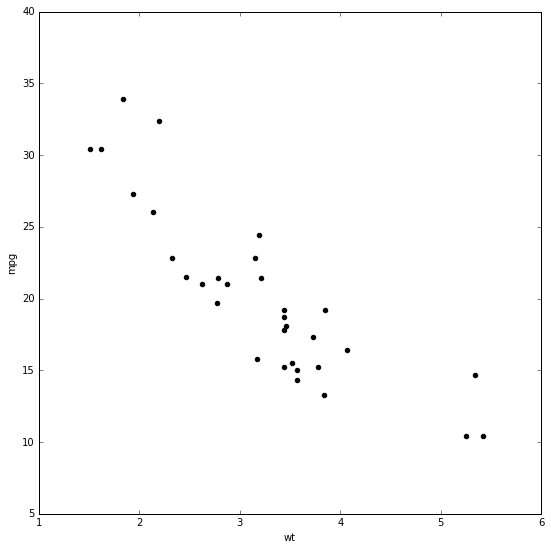

In [2]:
mtcars.plot(kind='scatter',
            x='wt',
            y='mpg',
            figsize=(9,9),
            color='black')

散点图显示，车重和油耗之间，大致存在线性关系，表明线性回归模型也许是行之有效的。

## Python's scikit-learn library contains a wide range of functions for predictive modeling.

In [3]:
from sklearn import linear_model

In [4]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X=pd.DataFrame(mtcars['wt']),
                     y=mtcars['mpg'])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients

print(regression_model.coef_)

37.2851261673
[-5.34447157]


输出的是：最优拟合的y截距和权值系数

### .score() 对模型好坏(拟合优度)做出评估：做出来的模型可以explain多少 "真实因变量的离散程度variance"，即 预测结果/真实结果

In [5]:
regression_model.score(pd.DataFrame(mtcars['wt']),mtcars['mpg'])

0.75283279365826461

**car weight explains roughly 75% of the variance in mpg.**

线性回归采用的评估函数score function 是 R-squared

![rfomula](rfomula.png)![r2](r2.png)

上述的SSR是SS Regression 回归平方和。不是 SS Residual 残差平方和，SSE才是。

In [6]:
# 用回归平方和 求R²：

train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))
SSR = (( train_prediction-mtcars["mpg"].mean())**2).sum()  
SST = ((mtcars['mpg']-mtcars['mpg'].mean())**2).sum()

SSR/SST
#与上面基本一致

0.75283279365826505

误差（残差）平方和求R²： ![SSE](SSE.png)

In [7]:

residuals = mtcars["mpg"] - train_prediction 

SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

1 - (SSResiduals/SSTotal)  

0.7528327936582646

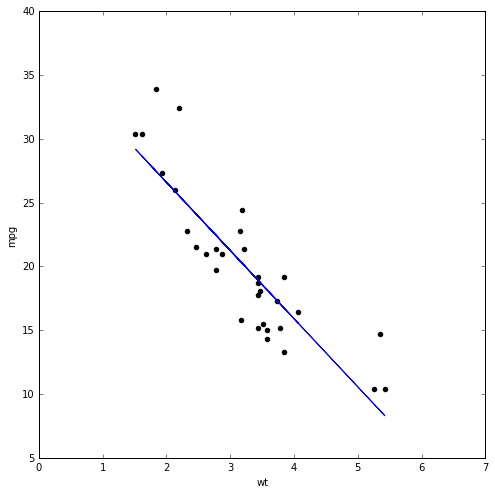

In [8]:
# 画出拟合效果
mtcars.plot(kind='scatter',
            x='wt',
            y='mpg',
            figsize=(8,8),
            color='black',
            xlim=(0,7))

plt.plot(mtcars['wt'],
         train_prediction,
         color='blue')

### 异常值的影响

Since regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model.

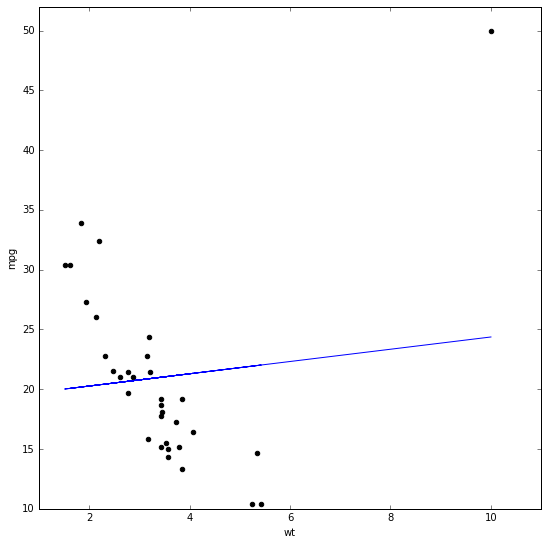

In [13]:
# 人为加入一些异常值来观察下：

mtcars_subset = mtcars[['mpg','wt']]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)   # 可以像list里一样，用append添加行

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))
                                       #这里要用pd.DataFrame变成2维(33,1),否则是1维的Series(33,)

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))
                                             
# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue")

### 如何证实一个模型行之有效，即我们可以选用该线性回归模型（而不是其他模型）？
 
好的模型，残差 要大致服从 正态分布。意味着误差 较均匀的分布在回归线上下。对此，我们可以画（残差的）正态概率图 来查看：

scipy.stats.probplot() 

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.032779748945897, -4.8544962703334

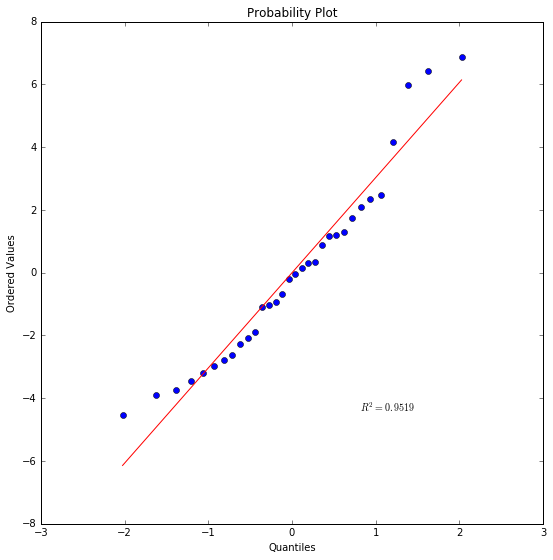

In [14]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt)

当 残差 服从正态分布，散点将紧密聚集在直线附近。

此例中，残差 在尾端相对直线有较大弯曲， 倾向非线性模型。这说明 简单的直线不足以描述'wt'和'mpg'之间的关系，可能需要用更复杂点的曲线模型。

### 做完模型预测后，评估模型表现的度量方法：**mean_squared_error()**

之前讲过R²，但它仅适用于回归模型。我们想要更通用的评估方法，以比较不同类型的模型的表现，比如采用 Root mean squared error(RMSE) 
 ’根 均方误差‘：
 


 ![MSE](MSE.png)

In [76]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction,mtcars['mpg'])**0.5

print(RMSE)

2.94916268596


## Polynomial Regression

变量之间并非线性关系，无法用直线拟合。因此，模型中加入更高次项，用多项式（线性）回归来拟合一条曲线。

In [45]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           # Include weight
                           mtcars["wt"]**2]).T     # Include weight squared 原一次模型中加入2次项；注意此处的转置

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])


print("Model intercept: ", poly_model.intercept_)  # Check trained model y-intercept


print("Model Coefficients: ",poly_model.coef_) # Check trained model coefficients (scaling factor given to "wt")

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept:  49.9308109495
Model Coefficients:  [-13.38033708   1.17108689]


0.81906135813840941

结果显示R²提升，二次模型表现比一次更好。但需要注意的是，在线性模型中加入更多变量绝不会使R²减小（只会使模型更复杂），因此，务必谨慎添加变量。

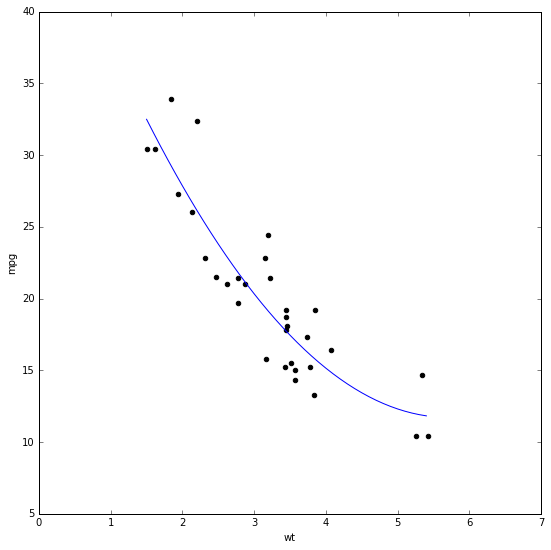

In [68]:
#画图
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)     # 因为是曲线是连续型的，所以需要指定范围，然后连成平滑的线
                                                

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,         #预测该区间内的连续的40个点，然后连成平滑的线，而不是原数据中孤立的32个点
                               poly_line_range**2]).T     # 现X 含一次和二次 两项自变量，因此传入的不再是mtcars['wt'] 一项

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)   # x 轴为区间（1.5，5.5），预测40个点的y值

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue")

使用这个新模型对原数据做预测，并检查RMSE：

In [79]:
preds=poly_model.predict(X=predictors)

rmse = mean_squared_error(preds,mtcars['mpg'])**0.5

print(rmse)
print(RMSE)  # 一次模型的RMSE


poly_model.score(predictors,mtcars['mpg'])



2.52330047246
2.94916268596


0.81906135813840941

RMSE 更小，R²更大，所以二次模型表现更好。但要留心过拟合。

### 过拟合

In [83]:
poly_model_15 = linear_model.LinearRegression()
predictors_15 = pd.DataFrame([mtcars['wt'],
                              mtcars['wt']**2,
                              mtcars['wt']**3,
                              mtcars['wt']**4,
                              mtcars['wt']**5,
                              mtcars['wt']**6,
                              mtcars['wt']**7,
                              mtcars['wt']**8,
                              mtcars['wt']**9,
                              mtcars['wt']**10,
                              mtcars['wt']**11,
                              mtcars['wt']**12,
                              mtcars['wt']**13,
                              mtcars['wt']**14,
                              mtcars['wt']**15]).T
                        
                            
                              

In [85]:
poly_model_15.fit(predictors_15,mtcars['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
poly_model_15.intercept_

-1183.748861926794

In [87]:
poly_model_15.coef_

array([  1.15476943e+03,   8.27020410e+02,  -3.77327253e+02,
        -9.90213111e+02,  -8.54583161e+01,   1.01496250e+03,
         5.84442749e+01,  -1.14652451e+03,   1.05397525e+03,
        -4.97385485e+02,   1.43995449e+02,  -2.66139583e+01,
         3.07573419e+00,  -2.03157344e-01,   5.86596963e-03])

In [89]:
poly_model_15.score(predictors_15,mtcars['mpg'])

0.87931581879678333

In [95]:
y1

array([ 20.56080927,  20.8748339 ,  24.84976849,  20.95213474,
        17.48053883,  17.13756658,  15.60038839,  21.1805243 ,
        21.45277427,  17.48053883,  17.48053883,  16.38111363,
        15.3015586 ,  15.73989688,  10.39977394,  10.39767585,
        14.69862114,  27.13398207,  31.14543791,  31.05292105,
        22.25030251,  16.20409195,  17.5677578 ,  16.47339628,
        16.53904758,  30.51771251,  28.15553159,  30.15861009,
        21.33110216,  20.38447899,  15.60038839,  20.4162018 ])

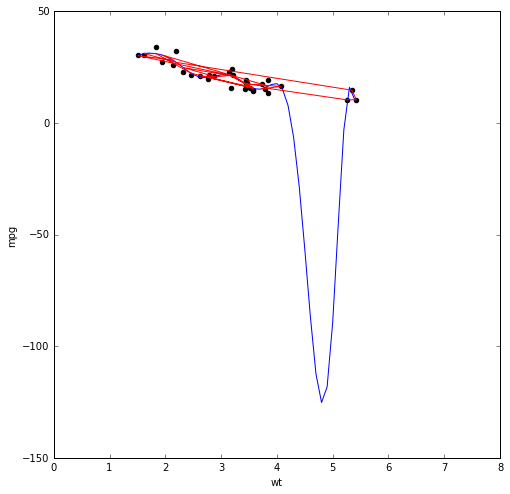

In [102]:
p_range15 = np.arange(1.5,5.5,0.1)

poly_range = pd.DataFrame([p_range15,p_range15**2,p_range15**3,p_range15**4,p_range15**5,p_range15**6,p_range15**7,
                           p_range15**8,p_range15**9,p_range15**10,p_range15**11,p_range15**12,p_range15**13,
                           p_range15**14,p_range15**15]).T

y1 = poly_model_15.predict(predictors_15)   # 只预测原数据中的32个点
y_value = poly_model_15.predict(X=poly_range) #预测区间内的40个点

mtcars.plot(kind='scatter',
            x = 'wt',
            y = 'mpg',
            figsize=(8,8),
            xlim=(0,8),
            color='black')

plt.plot(p_range15,
         y_value,
         color='blue')

plt.plot(mtcars['wt'],
         y1,
         color='red')

Muliple Linear Regression

数据中含有多个解释变量，即2维训练数据框中有更多columns。

In [104]:
# 在原模型基础上，加上变量"horsepower"

multi_model = linear_model.LinearRegression()
multi_model.fit(X=mtcars.ix[:,['wt','hp']],
                y=mtcars['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
multi_model.intercept_

37.227270116447215

In [106]:
multi_model.coef_

array([-3.87783074, -0.03177295])

In [109]:
multi_model.score(X=mtcars.loc[:,['wt','hp']],y=mtcars['mpg'])  # R²

0.8267854518827914

The improved R-squared score suggests horsepower has a linear relationship with mpg. Let's investigate with a plot:

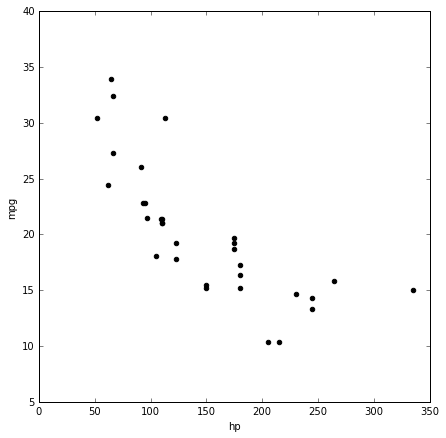

In [111]:
mtcars.plot(kind='scatter',
            x='hp',
            y='mpg',
            color='black',
            figsize=(7,7))

从图中看出，the relationship appears more curved than linear，因此多元多项式回归模型可能要好些：

In [115]:
multi_poly_model = linear_model.LinearRegression()

poly_predictors = pd.DataFrame([mtcars['wt'],
                                mtcars['hp'],
                                mtcars['wt']**2,
                                mtcars['hp']**2]).T

multi_poly_model.fit(poly_predictors,mtcars['mpg'])

print("R-squared: ",multi_poly_model.score(poly_predictors,mtcars['mpg']))
print("RMSE :", mean_squared_error(multi_poly_model.predict(poly_predictors),mtcars['mpg'])**0.5)

R-squared:  0.890727954967
RMSE : 1.96091081342


仅2个变量，2个二次项，所以不用太担心过拟合。要注意是，多元模型涉及的维度变多，很难做可视化，只能依赖数值输出。

我们也可以继续添加解释变量来改善模型。但是，那些与因变量没什么相关关系的，或者与某些已有变量重叠的，对线性回归而言，加进来可能有害（多重共线性）；也需要警惕那些不具有唯一性的数值变量，他们通常表现得更像分类变量。

# Wrap up
线性回归是数值预测中最常用的技巧。任何时候做数值预测的任务，都可以尝试从线性回归作为出发，从简单到复杂。

下一章，我们回顾Titanic 数据集，集中探讨分类（classification）：将观察值划分到某一个类别。